In [25]:
!pip install --upgrade tensorflow   

from platform import python_version
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import backend as K
import random
import matplotlib.pyplot as plt

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
n_class=10;
col=x_train.shape[2]
row=x_train.shape[1]

#for DNN model data formatting 
x_train_dnn = x_train.reshape(x_train.shape[0], row*col)
x_test_dnn = x_test.reshape(x_test.shape[0], row*col)

#for CNN model data formatting 
x_train_cnn=x_train.reshape(x_train.shape[0], row,col,1)
x_test_cnn=x_test.reshape(x_test.shape[0], row,col,1)

# normalising by dividing by 255
X_train_dnn=x_train_dnn.astype('float32')/255
x_test_dnn=x_test_dnn.astype('float32')/255
x_train_cnn=x_train_cnn.astype('float32')/255
x_test_cnn=x_test_cnn.astype('float32')/255


In [28]:
print(x_train_dnn.shape)
print(x_test_dnn.shape)
print(x_train_cnn.shape)

(60000, 784)
(10000, 784)
(60000, 28, 28, 1)


In [0]:
y_train = keras.utils.to_categorical(y_train, n_class)
y_test = keras.utils.to_categorical(y_test, n_class)

In [0]:

class EarlyStopping(Callback):
    def __init__(self, monitor='accuracy', value=1.0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            print ("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True



In [0]:
batch=1000


In [49]:
#DNN model

tf.keras.backend.clear_session() 
model = Sequential()
model.add(Dense(64, input_shape=(row*col,)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(n_class))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='accuracy',verbose=1)]

model.fit(x_train_dnn,y_train,nb_epoch=100,batch_size=batch,validation_split=0.2)
model.save('my_model.h5')



Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 1s 12us/sample - loss: 28.7282 - accuracy: 0.5832 - val_loss: 7.2281 - val_accuracy: 0.7028
Epoch 2/100
48000/48000 [==============================] - 0s 4us/sample - loss: 4.8353 - accuracy: 0.6796 - val_loss: 2.6513 - val_accuracy: 0.5748
Epoch 3/100
48000/48000 [==============================] - 0s 4us/sample - loss: 2.0891 - accuracy: 0.6112 - val_loss: 1.8134 - val_accuracy: 0.6427
Epoch 4/100
48000/48000 [==============================] - 0s 4us/sample - loss: 1.6396 - accuracy: 0.6535 - val_loss: 1.5419 - val_accuracy: 0.6603
Epoch 5/100
48000/48000 [==============================] - 0s 4us/sample - loss: 1.4458 - accuracy: 0.6619 - val_loss: 1.4110 - val_accuracy: 0.6680
Epoch 6/100
48000/48000 [==============================] - 0s 4us/sample - loss: 1.3073 - accuracy: 0.6735 - val_loss: 1.3358 - val_accuracy: 0.6700
Epoch 7/100
48000/48000 [=============================

In [0]:
#CNN model


model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3),input_shape=(row,col,1)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model_1.add(Flatten())
model_1.add(Dense(128))
model_1.add(Activation('relu'))
model_1.add(Dense(128))
model_1.add(Activation('relu'))
model_1.add(Dense(n_class))
model_1.add(Activation('softmax'))

In [34]:
model_1.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='accuracy',verbose=1)]

CNN=model_1.fit(x_train_cnn,y_train,epochs=30,batch_size=batch,validation_split=0.2)
model_1.save('my_model_1.h5')

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 42us/sample - loss: 1.0496 - accuracy: 0.6456 - val_loss: 0.6454 - val_accuracy: 0.7462
Epoch 2/30
48000/48000 [==============================] - 1s 30us/sample - loss: 0.5471 - accuracy: 0.7976 - val_loss: 0.4870 - val_accuracy: 0.8213
Epoch 3/30
48000/48000 [==============================] - 1s 30us/sample - loss: 0.4512 - accuracy: 0.8350 - val_loss: 0.4213 - val_accuracy: 0.8468
Epoch 4/30
48000/48000 [==============================] - 1s 30us/sample - loss: 0.3935 - accuracy: 0.8579 - val_loss: 0.3870 - val_accuracy: 0.8625
Epoch 5/30
48000/48000 [==============================] - 1s 29us/sample - loss: 0.3595 - accuracy: 0.8691 - val_loss: 0.3500 - val_accuracy: 0.8742
Epoch 6/30
48000/48000 [==============================] - 1s 30us/sample - loss: 0.3275 - accuracy: 0.8807 - val_loss: 0.3337 - val_accuracy: 0.8812
Epoch 7/30
48000/48000 [==============================] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


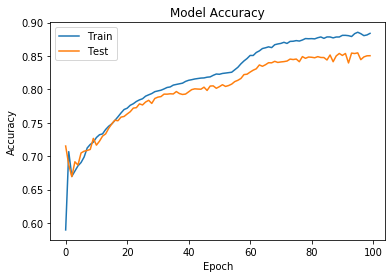

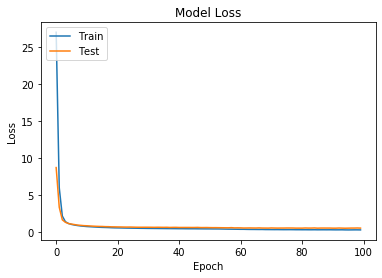

In [50]:
#DNN = model.fit(train_images, train_labels, validation_split=0.2, epochs=20)
# list all data in history
print(DNN.history.keys())
# summarize history for accuracy
plt.plot(DNN.history['accuracy'])
plt.plot(DNN.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(DNN.history['loss'])
plt.plot(DNN.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


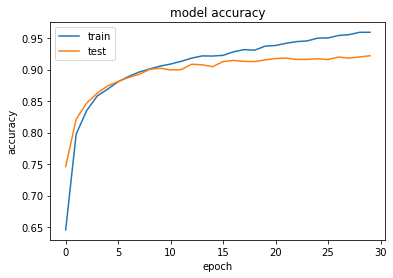

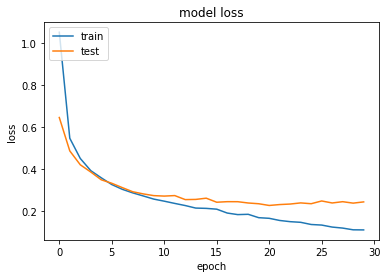

In [41]:
print(CNN.history.keys())
# summarize history for accuracy
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model_1.save("cnn.h5")

In [45]:
model_1.evaluate(x_test_cnn,y_test)

10000/10000 [==============================] - 1s 110us/sample - loss: 0.2636 - accuracy: 0.9142


[0.26360154898762705, 0.9142]

In [48]:
model.evaluate(x_test_dnn,y_test)

10000/10000 [==============================] - 1s 86us/sample - loss: 2.6044 - accuracy: 0.1663


[2.6044134117126463, 0.1663]